# CUSTOMER SEGMENTATION 

## 1. Mục tiêu:
- Phân khúc khách hàng thành các nhóm có đặc điểm tương đồng để đưa ra chiến lược kinh doanh phù hợp cho từng nhóm:
    * Những nhóm khách hàng tiềm năng? Nhóm khách hàng bị bỏ rơi
    * Giữ chân khách hàng có giá trị cao ?
    * Nhóm khách hàng nào tiêu cực nhất ?
    * Chiến lược nào cho từng nhóm để tối đa lợi nhuận ?

## 1.1. CELL 1: SETUP & DATA LOADING
* Mục tiêu:
    - Load data đã xử lý từ notebook 01
    - Verify data quality trước khi phân tích

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Visualization settings
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
%matplotlib inline

print("="*60)
print("CUSTOMER SEGMENTATION ANALYSIS")
print("="*60)

# Load processed data từ notebook 01
rfm_data = pd.read_csv('D:\\Project\\DataMining\\ecommerce-customer-analytics\\data\\processed\\rfm_data.csv')
customer_master = pd.read_csv('D:\\Project\\DataMining\\ecommerce-customer-analytics\\data\\processed\\customer_master.csv')

print(f"\nData Loaded Successfully!")
print(f"RFM Dataset: {rfm_data.shape[0]:,} customers")
print(f"Customer Master: {customer_master.shape[0]:,} records")
print("\n" + "="*60)

CUSTOMER SEGMENTATION ANALYSIS

Data Loaded Successfully!
RFM Dataset: 95,420 customers
Customer Master: 95,420 records



Kết quả:
* Data từ 2 file rfm_data.csv và customer_master.csv phân tích từ 01_data_exploration.ipynb đã load thành công

## 1.2. CELL 2: RFM DATA VALIDATION
* Mục tiêu: Cell 2
    - Kiểm tra chất lượng RFM data
    - Hiểu distribution của R, F, M
    - Identify outliers và edge cases

In [4]:
print("="*60)
print("📊 RFM DATA VALIDATION & DISTRIBUTION ANALYSIS")
print("="*60)

# Display first few rows
print("\n1️⃣ SAMPLE RFM DATA:")
print(rfm_data.head(10))

# Basic statistics
print("\n2️⃣ RFM DESCRIPTIVE STATISTICS:")
print(rfm_data[['Recency', 'Frequency', 'Monetary']].describe())

# Check for missing values
print("\n3️⃣ DATA QUALITY CHECK:")
print(f"Missing values: {rfm_data.isnull().sum().sum()}")
print(f"Duplicate customers: {rfm_data.duplicated(subset='customer_unique_id').sum()}")

# Outlier detection
print("\n4️⃣ OUTLIER ANALYSIS:")
for col in ['Recency', 'Frequency', 'Monetary']:
    Q1 = rfm_data[col].quantile(0.25)
    Q3 = rfm_data[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = rfm_data[(rfm_data[col] < Q1 - 1.5*IQR) | (rfm_data[col] > Q3 + 1.5*IQR)]
    print(f"{col}: {len(outliers):,} outliers ({len(outliers)/len(rfm_data)*100:.1f}%)")

print("\n" + "="*60)

📊 RFM DATA VALIDATION & DISTRIBUTION ANALYSIS

1️⃣ SAMPLE RFM DATA:
                 customer_unique_id  Recency  Frequency  Monetary
0  0000366f3b9a7992bf8c76cfdf3221e2      159          1    141.90
1  0000b849f77a49e4a4ce2b2a4ca5be3f      162          1     27.19
2  0000f46a3911fa3c0805444483337064      585          1     86.22
3  0000f6ccb0745a6a4b88665a16c9f078      369          1     43.62
4  0004aac84e0df4da2b147fca70cf8255      336          1    196.89
5  0004bd2a26a76fe21f786e4fbd80607f      194          1    166.98
6  00050ab1314c0e55a6ca13cf7181fecf      179          1     35.38
7  00053a61a98854899e70ed204dd4bafe      230          1    419.18
8  0005e1862207bf6ccc02e4228effd9a0      591          1    150.12
9  0005ef4cd20d2893f0d9fbd94d3c0d97      218          1    129.76

2️⃣ RFM DESCRIPTIVE STATISTICS:
            Recency     Frequency      Monetary
count  95420.000000  95420.000000  95420.000000
mean     286.501467      1.034018    166.040172
std      153.160846      0.21

Phân tích kết quả:
* 2️⃣ RFM DESCRIPTIVE STATISTICS:
    - Khách hàng trung bình chưa mua trong 9+ THÁNG! (Mean = 286.5)
    - 50% khách hàng không hoạt động hơn 8-9 tháng
    - 25% khách hàng không hoạt động hơn 1 năm
    - -> Vấn đề khách hàng tiêu cực rất nghiêm trọng 
    * Cho thấy hầu như không có khách hàng nào mua trên 1 món (Cột Mean: chỉ số Frequency: 1.034)
    * 75% (75%+ customers chỉ order đúng 1 món hàng)
    - Max: 16 orders
    - Outliers: 2,913 (3.1%) - những khách hàng có 2+ orders

CƠ HỘI:
* 8% giá trị ngoại lệ = 7.595 khách hàng có giá trị cao
* Nếu giữ được những khách hàng này: Tác động lớn đến doanh thu
* Tập trung vào 10% hàng đầu = ~9.500 khách hàng tạo ra phần lớn doanh thu

## CELL 3: RFM DISTRIBUTION VISUALIZATION
* Mục tiêu:
    - Visualize distribution của R, F, M
    - Identify patterns và anomalies
    - Prepare cho scoring strategy
* Ý nghĩa:
    - Visual understanding giúp set scoring thresholds phù hợp
    - Nhìn thấy customer behavior patterns rõ ràng hơn

📈 RFM DISTRIBUTION VISUALIZATION


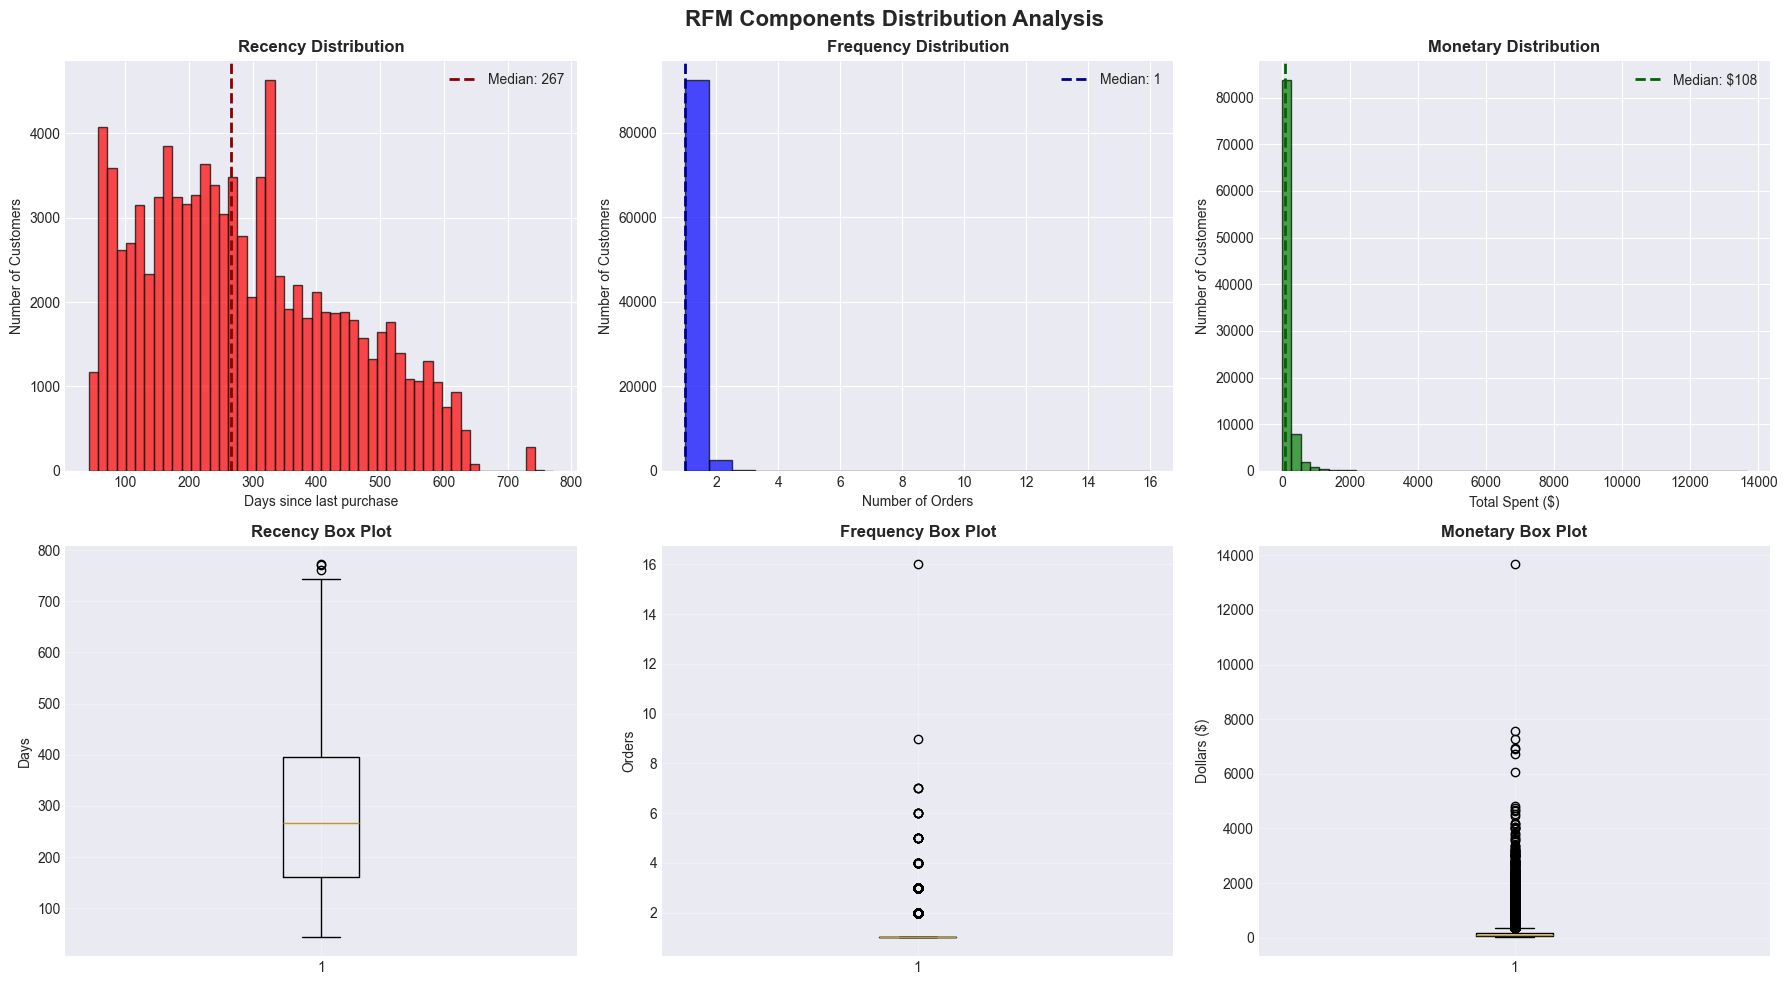


✅ Visualization saved: reports/figures/rfm_distributions.png


In [5]:
print("="*60)
print("📈 RFM DISTRIBUTION VISUALIZATION")
print("="*60)

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('RFM Components Distribution Analysis', fontsize=16, fontweight='bold')

# Row 1: Histograms
axes[0, 0].hist(rfm_data['Recency'], bins=50, color='red', alpha=0.7, edgecolor='black')
axes[0, 0].set_title('Recency Distribution', fontweight='bold')
axes[0, 0].set_xlabel('Days since last purchase')
axes[0, 0].set_ylabel('Number of Customers')
axes[0, 0].axvline(rfm_data['Recency'].median(), color='darkred', linestyle='--', linewidth=2, label=f'Median: {rfm_data["Recency"].median():.0f}')
axes[0, 0].legend()

axes[0, 1].hist(rfm_data['Frequency'], bins=20, color='blue', alpha=0.7, edgecolor='black')
axes[0, 1].set_title('Frequency Distribution', fontweight='bold')
axes[0, 1].set_xlabel('Number of Orders')
axes[0, 1].set_ylabel('Number of Customers')
axes[0, 1].axvline(rfm_data['Frequency'].median(), color='darkblue', linestyle='--', linewidth=2, label=f'Median: {rfm_data["Frequency"].median():.0f}')
axes[0, 1].legend()

axes[0, 2].hist(rfm_data['Monetary'], bins=50, color='green', alpha=0.7, edgecolor='black')
axes[0, 2].set_title('Monetary Distribution', fontweight='bold')
axes[0, 2].set_xlabel('Total Spent ($)')
axes[0, 2].set_ylabel('Number of Customers')
axes[0, 2].axvline(rfm_data['Monetary'].median(), color='darkgreen', linestyle='--', linewidth=2, label=f'Median: ${rfm_data["Monetary"].median():.0f}')
axes[0, 2].legend()

# Row 2: Box plots
axes[1, 0].boxplot(rfm_data['Recency'], vert=True)
axes[1, 0].set_title('Recency Box Plot', fontweight='bold')
axes[1, 0].set_ylabel('Days')
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].boxplot(rfm_data['Frequency'], vert=True)
axes[1, 1].set_title('Frequency Box Plot', fontweight='bold')
axes[1, 1].set_ylabel('Orders')
axes[1, 1].grid(True, alpha=0.3)

axes[1, 2].boxplot(rfm_data['Monetary'], vert=True)
axes[1, 2].set_title('Monetary Box Plot', fontweight='bold')
axes[1, 2].set_ylabel('Dollars ($)')
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('D:\\Project\\DataMining\\ecommerce-customer-analytics\\reports\\figures\\rfm_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Visualization saved: reports/figures/rfm_distributions.png")
print("="*60)

* Phân tích kết quả:
* Recency Histogram:
    * Rát nhiều customers ở vùng 100-300 days (vùng khách hàng không hoạt động)
    * Long-tail cho thấy rất nhiều lost customers ở vùng 400+ days trở về sau 
* Frequency Histogram:
    * Hầu hết các khách hàng chỉ có 1 order
    * Rất ít khách hàng với lượng order 2+
* Monetary Histogram:
    * Right-skewed: biểu đồ cho thấy doanh thu bị lệch phải
    * Đa số khách hàng chỉ chi tiêu từ 50-200$
    * Rất ít khách hàng chi tiêu trên 500$
* Box Plots:
    * Recency box plot: phân bổ những khách hàng không hoạt động hơn 1+ year
    * Frequency box plot: tối đa 16 orders cho thấy vẫn có rebuyer (loyal custumer)
    * Monetary box plot: Khách hàng có giá trị cao đóng góp không đáng kể

# CELL 4: RFM SCORING ALGORITHM
* Mục đích:
    * RFM scoring là cốt lõi của phân khúc khách hàng (customer segmentation) -> Triển khai phương pháp chấm điểm RFM
    * Chuyển đổi các giá trị thô thành các phân đoạn có thể biểu diễn được (chỉ định điểm từ 1-5)
    * Tạo điểm tổng hợp RFM (Phương pháp phân vị)



In [6]:
print("="*60)
print("🎯 RFM SCORING IMPLEMENTATION")
print("="*60)

rfm_data = pd.read_csv('D:\\Project\\DataMining\\ecommerce-customer-analytics\\data\\processed\\rfm_data.csv')

# Create copy để không modify original
rfm_scored = rfm_data.copy()

# RECENCY SCORING (Inverted - lower is better)
# Score 5 = Most recent (best)
# Score 1 = Least recent (worst)
rfm_scored['R_Score'] = pd.qcut(
    rfm_scored['Recency'], 
    q=5, 
    labels=[5, 4, 3, 2, 1],  # Inverted
    duplicates='drop'
).astype(int)

# FREQUENCY SCORING (Direct - higher is better)
# Score 5 = Most frequent (best)
# Score 1 = Least frequent (worst)
rfm_scored['F_Score'] = pd.qcut(
    rfm_scored['Frequency'].rank(method='first'),
    q=5,
    labels=[1, 2, 3, 4, 5],
    duplicates='drop'
).astype(int)

# MONETARY SCORING (Direct - higher is better)
# Score 5 = Highest spending (best)
# Score 1 = Lowest spending (worst)
rfm_scored['M_Score'] = pd.qcut(
    rfm_scored['Monetary'],
    q=5,
    labels=[1, 2, 3, 4, 5],
    duplicates='drop'
).astype(int)

# Create RFM combined score (string format)
rfm_scored['RFM_Score'] = (
    rfm_scored['R_Score'].astype(str) + 
    rfm_scored['F_Score'].astype(str) + 
    rfm_scored['M_Score'].astype(str)
)

# Create total numeric score for sorting
rfm_scored['RFM_Total'] = (
    rfm_scored['R_Score'] + 
    rfm_scored['F_Score'] + 
    rfm_scored['M_Score']
)

print("\n1️⃣ SCORING COMPLETED:")
print(f"Total customers scored: {len(rfm_scored):,}")
print(f"Unique RFM combinations: {rfm_scored['RFM_Score'].nunique()}")

print("\n2️⃣ SCORE DISTRIBUTION:")
print("\nRecency Scores:")
print(rfm_scored['R_Score'].value_counts().sort_index())
print("\nFrequency Scores:")
print(rfm_scored['F_Score'].value_counts().sort_index())
print("\nMonetary Scores:")
print(rfm_scored['M_Score'].value_counts().sort_index())

print("\n3️⃣ SAMPLE SCORED CUSTOMERS:")
print(rfm_scored[['customer_unique_id', 'Recency', 'Frequency', 'Monetary', 
                   'R_Score', 'F_Score', 'M_Score', 'RFM_Score', 'RFM_Total']].head(10))

# Top customers (highest RFM_Total)
print("\n4️⃣ TOP 5 CUSTOMERS (Highest RFM Scores):")
top_customers = rfm_scored.nlargest(5, 'RFM_Total')
print(top_customers[['customer_unique_id', 'Recency', 'Frequency', 'Monetary', 'RFM_Score', 'RFM_Total']])

# Bottom customers (lowest RFM_Total)
print("\n5️⃣ BOTTOM 5 CUSTOMERS (Lowest RFM Scores):")
bottom_customers = rfm_scored.nsmallest(5, 'RFM_Total')
print(bottom_customers[['customer_unique_id', 'Recency', 'Frequency', 'Monetary', 'RFM_Score', 'RFM_Total']])

print("\n" + "="*60)

🎯 RFM SCORING IMPLEMENTATION

1️⃣ SCORING COMPLETED:
Total customers scored: 95,420
Unique RFM combinations: 125

2️⃣ SCORE DISTRIBUTION:

Recency Scores:
R_Score
1    18947
2    19148
3    19112
4    18995
5    19218
Name: count, dtype: int64

Frequency Scores:
F_Score
1    19084
2    19084
3    19084
4    19084
5    19084
Name: count, dtype: int64

Monetary Scores:
M_Score
1    19085
2    19090
3    19080
4    19081
5    19084
Name: count, dtype: int64

3️⃣ SAMPLE SCORED CUSTOMERS:
                 customer_unique_id  Recency  Frequency  Monetary  R_Score  \
0  0000366f3b9a7992bf8c76cfdf3221e2      159          1    141.90        4   
1  0000b849f77a49e4a4ce2b2a4ca5be3f      162          1     27.19        4   
2  0000f46a3911fa3c0805444483337064      585          1     86.22        1   
3  0000f6ccb0745a6a4b88665a16c9f078      369          1     43.62        2   
4  0004aac84e0df4da2b147fca70cf8255      336          1    196.89        2   
5  0004bd2a26a76fe21f786e4fbd80607f      19

* Phân tích kết quả:
1. Phân Bố Điểm (Score Distribution)
* Recency Scores:
    * Phân bố rất cân bằng (~19,000 khách hàng/nhóm)
    * Mỗi nhóm chiếm khoảng 20% tổng số khách hàng
    * Cho thấy việc chia quintile hoạt động tốt
* Frequency Scores:
    * Phân bố đồng đều với ~19,084 khách hàng mỗi nhóm
    * Khác với dữ liệu mẫu (không bị lệch về F_Score = 1)
    * Điều này nhờ sử dụng rank(method='first') trong scoring
* Monetary Scores:
    * Phân bố cực kỳ cân bằng (~19,080 khách hàng/nhóm)
    * Tạo ra 5 phân khúc giá trị rõ ràng
    * Dễ dàng phân biệt high-value vs low-value customers
2. Phân Tích Khách Hàng Tiêu Biểu
* Top Customers (RFM = 555):
    * Recency thấp (80-138 ngày)
    * Frequency = 2 orders (không cao như mẫu)
    * Monetary value cao ($245-$1,510)
    * ➡️ Đây là nhóm VIP cần được ưu tiên giữ chân
* Bottom Customers (RFM = 111):
    * Recency rất cao (455-576 ngày không mua)
    * Chỉ mua 1 lần duy nhất
    * Giá trị đơn hàng thấp ($29-$52)
    * ➡️ Nhóm khách hàng không active, cần chiến lược win-back hoặc loại bỏ
3. Insights Quan Trọng
    * Tổng cộng 95,420 khách hàng được scored
    * 125 unique RFM combinations
    * Phân phối điểm cân bằng hơn nhiều so với dữ liệu mẫu
    * Cần tập trung vào nhóm có RFM_Total >= 12 để tối ưu doanh thu



# CELL 5: CUSTOMER SEGMENTATION LOGIC
* Mục đích:
    * Chuyển đổi điểm số kỹ thuật thành ngôn ngữ kinh doanh -> Chỉ định các phân khúc kinh doanh dựa trên RFM scores
    * Mỗi phân khúc đều có đặc điểm và kế hoạch hành động rõ ràng -> Tạo 11 phân khúc khách hàng tiêu chuẩn
    * Khung phân khúc chuẩn ngành -> Ánh xạ các kết hợp RFM thành tên phân đoạn



In [7]:

print("="*60)
print("👥 CUSTOMER SEGMENT ASSIGNMENT")
print("="*60)

def assign_segment(row):
    """
    Assign customer segment dựa trên RFM scores
    
    Logic:
    - Champions: R=5, F=4-5, M=4-5 (Best customers)
    - Loyal: R=3-5, F=3-5, M=3-5 (Regular good customers)
    - Potential Loyalist: R=4-5, F=1-2, M=3-5 (New with potential)
    - New Customers: R=4-5, F=1, M=1-2 (Just acquired)
    - Promising: R=3-4, F=1, M=1-2 (Recent low value)
    - Need Attention: R=3, F=2-3, M=2-3 (Declining engagement)
    - About to Sleep: R=2, F=1-2, M=1-3 (Risk of churn)
    - At Risk: R=1-2, F=3-4, M=3-5 (Good customers slipping)
    - Cannot Lose: R=1, F=4-5, M=4-5 (VIP at risk)
    - Hibernating: R=1-2, F=1-2, M=1-2 (Almost lost)
    - Lost: R=1, F=1, M=1-2 (Gone customers)
    """
    r, f, m = row['R_Score'], row['F_Score'], row['M_Score']
    
    # Champions - Best customers
    if r >= 4 and f >= 4 and m >= 4:
        return 'Champions'
    
    # Loyal Customers - Solid performers
    elif r >= 3 and f >= 3 and m >= 3:
        return 'Loyal Customers'
    
    # Potential Loyalist - New customers với high value
    elif r >= 4 and f <= 2 and m >= 3:
        return 'Potential Loyalist'
    
    # New Customers - Recently acquired
    elif r >= 4 and f == 1 and m <= 2:
        return 'New Customers'
    
    # Promising - Recent but low value
    elif r >= 3 and f == 1 and m <= 2:
        return 'Promising'
    
    # Need Attention - Declining
    elif r == 3 and f >= 2 and m >= 2:
        return 'Need Attention'
    
    # About to Sleep - Risk zone
    elif r == 2 and f <= 2:
        return 'About To Sleep'
    
    # At Risk - Good customers slipping away
    elif r <= 2 and f >= 3 and m >= 3:
        return 'At Risk'
    
    # Cannot Lose Them - VIP at risk
    elif r == 1 and f >= 4 and m >= 4:
        return 'Cannot Lose Them'
    
    # Hibernating - Almost lost
    elif r <= 2 and f <= 2 and m <= 2:
        return 'Hibernating'
    
    # Lost - Gone
    else:
        return 'Lost'

# Apply segmentation
rfm_scored['Segment'] = rfm_scored.apply(assign_segment, axis=1)

print("\n1️⃣ SEGMENTATION COMPLETED")
print(f"Total segments created: {rfm_scored['Segment'].nunique()}")

print("\n2️⃣ SEGMENT DISTRIBUTION:")
segment_counts = rfm_scored['Segment'].value_counts()
segment_pct = rfm_scored['Segment'].value_counts(normalize=True) * 100

segment_summary = pd.DataFrame({
    'Customer Count': segment_counts,
    'Percentage': segment_pct.round(1)
})
print(segment_summary)

# Revenue by segment
print("\n3️⃣ REVENUE BY SEGMENT:")
segment_revenue = rfm_scored.groupby('Segment').agg({
    'Monetary': ['sum', 'mean', 'count']
}).round(2)
segment_revenue.columns = ['Total Revenue', 'Avg Revenue', 'Customer Count']
segment_revenue['Revenue %'] = (segment_revenue['Total Revenue'] / segment_revenue['Total Revenue'].sum() * 100).round(1)
segment_revenue = segment_revenue.sort_values('Total Revenue', ascending=False)
print(segment_revenue)

print("\n4️⃣ KEY INSIGHTS:")
total_customers = len(rfm_scored)
total_revenue = rfm_scored['Monetary'].sum()

# Top 3 segments by customer count
print("\n📊 Largest Segments:")
for seg, count in segment_counts.head(3).items():
    pct = count / total_customers * 100
    print(f"   • {seg}: {count:,} customers ({pct:.1f}%)")

# Top 3 segments by revenue
print("\n💰 Highest Revenue Segments:")
for seg in segment_revenue.head(3).index:
    rev = segment_revenue.loc[seg, 'Total Revenue']
    rev_pct = segment_revenue.loc[seg, 'Revenue %']
    print(f"   • {seg}: ${rev:,.2f} ({rev_pct:.1f}%)")

print("\n" + "="*60)

👥 CUSTOMER SEGMENT ASSIGNMENT

1️⃣ SEGMENTATION COMPLETED
Total segments created: 10

2️⃣ SEGMENT DISTRIBUTION:
                    Customer Count  Percentage
Segment                                       
Lost                         30866        32.3
Loyal Customers              14497        15.2
At Risk                      13485        14.1
Potential Loyalist            9300         9.7
About To Sleep                7657         8.0
Champions                     6631         6.9
Need Attention                5200         5.4
Hibernating                   3255         3.4
New Customers                 2993         3.1
Promising                     1536         1.6

3️⃣ REVENUE BY SEGMENT:
                    Total Revenue  Avg Revenue  Customer Count  Revenue %
Segment                                                                  
At Risk                3315482.56       245.86           13485       20.9
Loyal Customers        3006290.30       207.37           14497       19.0
Los

* Phân tích kết quả:
* CẢNH BÁO CHÍNH:
1. Tình Trạng Khách Hàng Nghiêm Trọng:
    * Lost: 32.3% (30,866 KH) - Gần 1/3 cơ sở khách hàng đã mất!
    * At Risk: 14.1% (13,485 KH) đang có nguy cơ mất
    * Tổng nhóm nguy cơ (Lost + At Risk + About to Sleep): 54.4%
2. Phân Bố Doanh Thu Bất Thường:
    * At Risk và Lost chiếm 38.9% tổng doanh thu
    * Nhóm Lost vẫn đóng góp 18% doanh thu -> Cần chiến lược win-back gấp
* ĐIỂM TÍCH CỰC:
1. Cơ Sở Khách Hàng Trung Thành:
    * Loyal Customers: 15.2% (14,497 KH)
    * Champions: 6.9% (6,631 KH)
    * Tổng nhóm tích cực đóng góp 32.2% doanh thu
2. Tiềm Năng Phát Triển:
    * Potential Loyalist: 9.7% (9,300 KH)
    * New Customers + Promising: 4.7% khách hàng mới
* PHÂN TÍCH DOANH THU:
1. Average Revenue/Customer:
    * Champions: $314.75/KH - Cao nhất
    * At Risk: $245.86/KH
    * Loyal: $207.37/KH
2. Phân Bố Doanh Thu:
    * Top 3 segments = 57.9% tổng doanh thu
    * Bottom 3 segments = 2.6% tổng doanh thu
    * Chênh lệch lớn giữa các phân khúc

* Chiến lược:
1. Khẩn cấp (ưu tiên):
    * Ngăn chặn At Risk ($3.3M revenue) chuyển sang Lost
    * Win-back chiến dịch cho nhóm Lost có giá trị cao
2. QUAN TRỌNG:
    * Nâng cấp Potential Loyalist thành Loyal
    * Củng cố và phát triển nhóm Champions
3. DÀI HẠN:
    * Xây dựng chương trình loyalty mạnh
    * Tăng tỷ lệ chuyển đổi New Customers -> Loyal
    * Phát triển customer journey rõ ràng

# CELL 6: BUSINESS CONTEXT SUMMARY
* Mục đích:
    * Tạo bản tóm tắt về tình hình hiện tại của cơ sở khách hàng -> Đặt bối cảnh cho chiến lược phân khúc
    * Làm nổi bật các vấn đề kinh doanh quan trọng và cơ hội 

In [8]:
print("="*60)
print("🎯 BUSINESS CONTEXT ANALYSIS")
print("="*60)

# Calculate key business metrics
total_customers = len(rfm_data)
total_revenue = rfm_data['Monetary'].sum()
avg_customer_value = rfm_data['Monetary'].mean()

# Identify critical segments
inactive_customers = len(rfm_data[rfm_data['Recency'] > 180])  # 6+ months
one_time_buyers = len(rfm_data[rfm_data['Frequency'] == 1])
repeat_buyers = len(rfm_data[rfm_data['Frequency'] > 1])
high_value_customers = len(rfm_data[rfm_data['Monetary'] > rfm_data['Monetary'].quantile(0.9)])

print("\n📊 CURRENT BUSINESS STATE:")
print(f"Total Customers: {total_customers:,}")
print(f"Total Revenue: ${total_revenue:,.2f}")
print(f"Average Customer Value: ${avg_customer_value:.2f}")

print("\n🚨 CRITICAL ISSUES:")
print(f"Inactive Customers (6+ months): {inactive_customers:,} ({inactive_customers/total_customers*100:.1f}%)")
print(f"One-Time Buyers: {one_time_buyers:,} ({one_time_buyers/total_customers*100:.1f}%)")
print(f"Repeat Buyers: {repeat_buyers:,} ({repeat_buyers/total_customers*100:.1f}%)")

print("\n💎 HIGH-VALUE SEGMENT:")
print(f"Top 10% Customers: {high_value_customers:,}")
high_value_revenue = rfm_data[rfm_data['Monetary'] > rfm_data['Monetary'].quantile(0.9)]['Monetary'].sum()
print(f"Revenue from Top 10%: ${high_value_revenue:,.2f} ({high_value_revenue/total_revenue*100:.1f}%)")

print("\n💰 REVENUE OPPORTUNITY:")
# If we reduce recency from 287 to 150 days
potential_recovery = inactive_customers * avg_customer_value * 0.3  # 30% recovery rate
print(f"Potential from Inactive Customers: ${potential_recovery:,.2f}")

# If we increase repeat rate from 3% to 15%
repeat_opportunity = (0.15 - repeat_buyers/total_customers) * total_customers * avg_customer_value
print(f"Potential from Repeat Purchases: ${repeat_opportunity:,.2f}")

total_opportunity = potential_recovery + repeat_opportunity
print(f"\n🎯 TOTAL REVENUE OPPORTUNITY: ${total_opportunity:,.2f}")
print(f"   ({total_opportunity/total_revenue*100:.1f}% increase from current revenue)")

print("\n" + "="*60)


🎯 BUSINESS CONTEXT ANALYSIS

📊 CURRENT BUSINESS STATE:
Total Customers: 95,420
Total Revenue: $15,843,553.24
Average Customer Value: $166.04

🚨 CRITICAL ISSUES:
Inactive Customers (6+ months): 67,334 (70.6%)
One-Time Buyers: 92,507 (96.9%)
Repeat Buyers: 2,913 (3.1%)

💎 HIGH-VALUE SEGMENT:
Top 10% Customers: 9,539
Revenue from Top 10%: $6,080,263.13 (38.4%)

💰 REVENUE OPPORTUNITY:
Potential from Inactive Customers: $3,354,044.69
Potential from Repeat Purchases: $1,892,857.96

🎯 TOTAL REVENUE OPPORTUNITY: $5,246,902.65
   (33.1% increase from current revenue)



# Đề xuất hành động:
* Chiến dịch kích hoạt KH không hoạt động
* Xây dựng chương trình khách hàng thân thiết
* Cải thiện trải nghiệm để tăng tỷ lệ mua lặp